# Dataset 
1. The dataset contains 18 columns and 4600 rows
2. For the polynomial regression , the data values are considered to be numeric

Link to Dataset :- https://www.kaggle.com/shree1992/housedata

In [57]:
# Import the required libraries
import numpy as np
import pandas as kpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [58]:
# Load the data set
data = pd.read_csv(r'C:\Users\Aniket Chauhan\Desktop\Linear_Regression_House_Dataset.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [59]:
# Print the shape of dataset
print(data.shape)

(4600, 18)


In [47]:
# Make a list of important features which is need to be included in training data
f = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
     'yr_renovated']

data = data[f]
print(data.shape)

(4600, 10)


In [60]:
# Drop the missing values
data = data.dropna()
print(data.shape)

(4600, 18)


In [61]:
# Get statictial information about the dataset
data['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

In [50]:
# Now , divide the dataset into two parts : independent variables and dependent variables
X = data[f[1:]]
y = data['price']

In [51]:
# Split the dataset into traning data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(3680, 9)
(920, 9)
(3680,)
(920,)


In [52]:
# Create the set of Polynomial Features order 2
pr = PolynomialFeatures(2)
X_train_poly = pr.fit_transform(X_train)
X_test_poly = pr.fit_transform(X_test)
print(pr.get_feature_names())

print(X_train_poly.shape)

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2']
(3680, 55)


In [62]:
# Fit the model to the polynomial features
lr = LinearRegression() 
lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# Create the predictions based on fitted model
y_test_predict = lr.predict(X_test_poly)
print(y_test_predict.shape)

(920,)


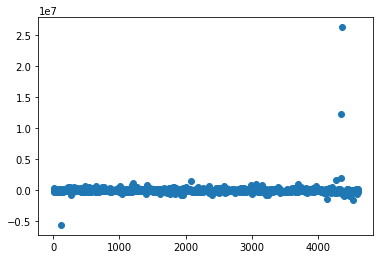

In [55]:
#Plot the error
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x6^2', 'x6 x7', 'x6 x8', 'x7^2', 'x7 x8', 'x8^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6', 'x0^2 x7', 'x0^2 x8', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x1 x8', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x2 x8', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x3 x8', 'x0 x4^2', 'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x4 x8', 'x0 x5^2', 'x0 x5 x6', 'x0 x5 x7', 'x0 x5 x8', 'x0 x6^2', 'x0 x6 x7', 'x0 x6 x8', 'x0 x7^2', 'x0 x7 x8', 'x0 x8^2', 'x1^3', 'x1^2 x2', 'x1^2

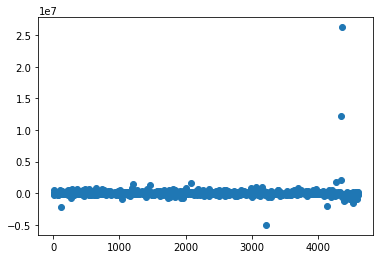

In [56]:
# Create the set of Polynomial Features order 3
pr = PolynomialFeatures(3)
X_train_poly = pr.fit_transform(X_train)
X_test_poly = pr.fit_transform(X_test)
print(pr.get_feature_names())

print(X_train_poly.shape)

# Fit the model to the polynomial features
lr = LinearRegression() 
lr.fit(X_train_poly, y_train)

# Create the predictions based on fitted model
y_test_predict = lr.predict(X_test_poly)
print(y_test_predict.shape)

#Plot the error
g=plt.plot((y_test - y_test_predict),marker='o',linestyle='')